<a href="https://colab.research.google.com/github/Akshatha-Gadasandula/ML_LAB/blob/main/ML_Assign_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ML ASSIGNMENT - 1 -----> 160123737150

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Q1(a) Load the dataset and prepare X (features) and y (target)

import pandas as pd

# Path to the dataset in Google Drive (update if needed)
file_path = "/content/drive/MyDrive/ML Assignment -1 /student-mat.csv"

# Dataset uses ";" as separator
data = pd.read_csv(file_path, sep=";")

print("Dataset shape:", data.shape)
print(data.head())

# Let's choose a target variable (final grade 'G3')
y = data["G3"]

# For simplicity, make this a classification problem:
# Pass if G3 >= 10, Fail otherwise
y = (y >= 10).astype(int)

# Drop the target column from features
X = data.drop(columns=["G3"])

print("X shape:", X.shape)
print("y distribution:\n", y.value_counts())


Dataset shape: (395, 33)
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
X shape: (395, 32)
y distribution:
 G3
1    265
0    130
Name: 

In [5]:
# Q1(b) Train-test split
from sklearn.model_selection import train_test_split

# Convert categorical columns to numeric (dummy encoding)
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)


Training set: (316, 41) (316,)
Testing set: (79, 41) (79,)


Q1(c) — Objective of Logistic Regression with L2 Regularization

👉 Write this explanation in your report, not code:

Objective Function:

min
⁡
𝑤

1
𝑁
∑
𝑖
=
1
𝑁
log
⁡
(
1
+
𝑒
−
𝑦
𝑖
(
𝑤
𝑇
𝑥
𝑖
)
)

+

𝜆
2
∥
𝑤
∥
2
2
w
min
	​


N
1
	​

i=1
∑
N
	​

log(1+e
−y
i
	​

(w
T
x
i
	​

)
) +
2
λ
	​

∥w∥
2
2
	​


First term = Logistic Loss (cross-entropy)

Second term = L2 penalty, prevents overfitting

λ controls strength of regularization


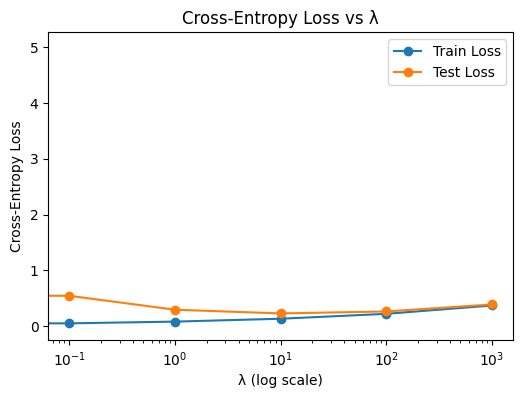

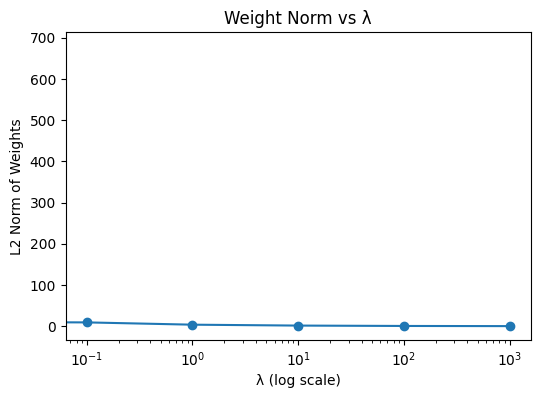

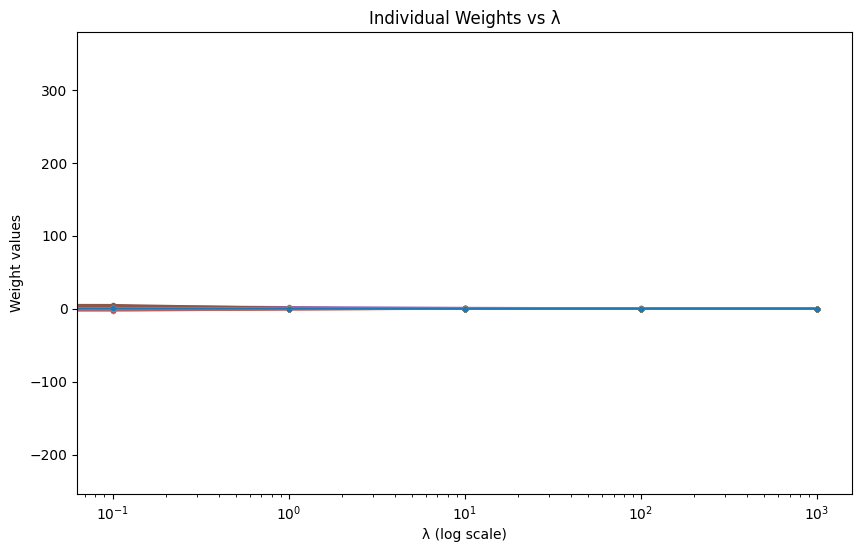

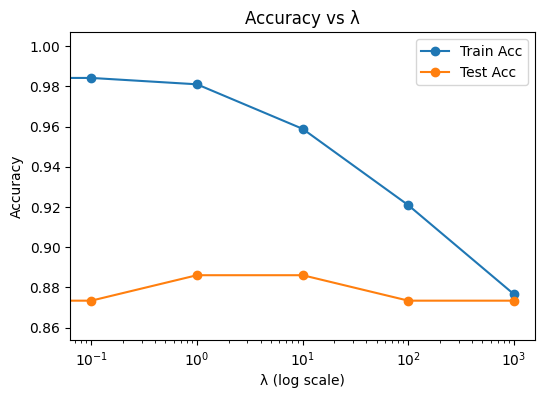

In [6]:
#1(d) — Logistic Regression with varying λ
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score

# Regularization values to test
lambdas = [0, 0.1, 1, 10, 100, 1000]

train_loss = []
test_loss = []
l2_norms = []
weights = []
train_acc = []
test_acc = []

for lam in lambdas:
    # In sklearn, C = 1/λ ; if λ=0, treat as very large C
    C_val = 1e10 if lam == 0 else 1/lam

    model = LogisticRegression(
        penalty="l2",
        C=C_val,
        solver="lbfgs",
        max_iter=500
    )
    model.fit(X_train, y_train)

    # Predictions (probabilities for log_loss)
    y_train_prob = model.predict_proba(X_train)
    y_test_prob = model.predict_proba(X_test)

    # Cross-entropy loss
    train_loss.append(log_loss(y_train, y_train_prob))
    test_loss.append(log_loss(y_test, y_test_prob))

    # L2 norm of weights
    l2_norms.append(np.linalg.norm(model.coef_))
    weights.append(model.coef_.flatten())

    # Accuracy
    train_acc.append(accuracy_score(y_train, model.predict(X_train)))
    test_acc.append(accuracy_score(y_test, model.predict(X_test)))

# Plot Cross-Entropy vs λ
plt.figure(figsize=(6,4))
plt.plot(lambdas, train_loss, marker='o', label="Train Loss")
plt.plot(lambdas, test_loss, marker='o', label="Test Loss")
plt.xscale('log')
plt.xlabel("λ (log scale)")
plt.ylabel("Cross-Entropy Loss")
plt.legend()
plt.title("Cross-Entropy Loss vs λ")
plt.show()

# Plot L2 norm of weights
plt.figure(figsize=(6,4))
plt.plot(lambdas, l2_norms, marker='o')
plt.xscale('log')
plt.xlabel("λ (log scale)")
plt.ylabel("L2 Norm of Weights")
plt.title("Weight Norm vs λ")
plt.show()

# Plot weights
weights = np.array(weights)
plt.figure(figsize=(10,6))
for i in range(weights.shape[1]):
    plt.plot(lambdas, weights[:, i], marker='.')
plt.xscale('log')
plt.xlabel("λ (log scale)")
plt.ylabel("Weight values")
plt.title("Individual Weights vs λ")
plt.show()

# Plot Accuracy
plt.figure(figsize=(6,4))
plt.plot(lambdas, train_acc, marker='o', label="Train Acc")
plt.plot(lambdas, test_acc, marker='o', label="Test Acc")
plt.xscale('log')
plt.xlabel("λ (log scale)")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy vs λ")
plt.show()


In [10]:
# 1(e) Gaussian Basis Function Transformation

import numpy as np
from sklearn.metrics.pairwise import rbf_kernel

# Function to transform features using Gaussian basis
def transform_with_gaussian_basis(X, sigma=1.0):
    # Convert DataFrame to NumPy array (important to avoid TypeError)
    X = np.array(X)
    # Use RBF Kernel (Gaussian)
    return rbf_kernel(X, X, gamma=1.0 / (2 * sigma ** 2))

# Example with sigma = 1
sigma_example = 1.0

X_train_g = transform_with_gaussian_basis(X_train, sigma_example)
X_test_g = rbf_kernel(np.array(X_test), np.array(X_train), gamma=1.0 / (2 * sigma_example ** 2))

print("Gaussian basis transformation applied successfully!")
print("Transformed training set shape:", X_train_g.shape)
print("Transformed testing set shape:", X_test_g.shape)


Gaussian basis transformation applied successfully!
Transformed training set shape: (316, 316)
Transformed testing set shape: (79, 316)


In [11]:
# 1(f) Comparing Linear, Polynomial, and Gaussian Basis Function Regression

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Polynomial Regression (degree = 3 as example)
poly_model = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)

# Gaussian Basis Function Regression
# Use the transformed features from 1(e)
gaussian_model = LinearRegression()
gaussian_model.fit(X_train_g, y_train)  # Train with transformed Gaussian basis
y_pred_gaussian = gaussian_model.predict(X_test_g)

# Evaluation
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

mse_gaussian = mean_squared_error(y_test, y_pred_gaussian)
r2_gaussian = r2_score(y_test, y_pred_gaussian)

# Results
print("Model Performance Comparison:")
print(f"Linear Regression -> MSE: {mse_linear:.4f}, R2: {r2_linear:.4f}")
print(f"Polynomial Regression (deg=3) -> MSE: {mse_poly:.4f}, R2: {r2_poly:.4f}")
print(f"Gaussian Basis Regression -> MSE: {mse_gaussian:.4f}, R2: {r2_gaussian:.4f}")


Model Performance Comparison:
Linear Regression -> MSE: 0.1439, R2: 0.3485
Polynomial Regression (deg=3) -> MSE: 0.3829, R2: -0.7343
Gaussian Basis Regression -> MSE: 0.2206, R2: 0.0009


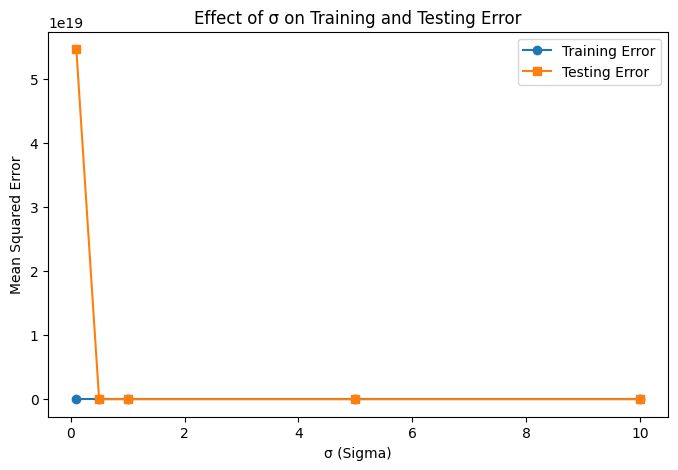

In [17]:
# 1(f) Gaussian Basis Function Regression — Training vs Testing Error

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Ensure all features are numeric
X_train_num = X_train.copy().astype(float)
X_test_num = X_test.copy().astype(float)

# Gaussian basis transformation function
def gaussian_basis_transform(X, sigma):
    """
    X: numpy array of shape (n_samples, n_features)
    sigma: width of Gaussian
    Returns: transformed features using 5 Gaussian basis functions per feature
    """
    X_new = []
    n_samples, n_features = X.shape# 1(f) Gaussian Basis Function Regression — Training vs Testing Error

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Ensure all features are numeric
X_train_num = X_train.copy().astype(float)
X_test_num = X_test.copy().astype(float)

# Gaussian basis transformation function
def gaussian_basis_transform(X, sigma):
    """
    X: numpy array of shape (n_samples, n_features)
    sigma: width of Gaussian
    Returns: transformed features using 5 Gaussian basis functions per feature
    """
    X_new = []
    n_samples, n_features = X.shape
    mus = np.linspace(-10, 10, 5)  # 5 basis functions per feature

    for f in range(n_features):
        col = X[:, f]
        # Scale column to [-10,10] for consistency
        col_scaled = (col - col.min()) / (col.max() - col.min()) * 20 - 10
        for mu in mus:
            gaussian_feature = np.exp(-((col_scaled - mu) ** 2) / (2 * sigma ** 2))
            X_new.append(gaussian_feature.reshape(-1, 1))  # reshape as column

    X_transformed = np.hstack(X_new)
    return X_transformed

# σ values to test
sigma_values = [0.1, 0.5, 1, 5, 10]
train_errors = []
test_errors = []

for sigma in sigma_values:
    X_train_g = gaussian_basis_transform(X_train_num.values, sigma)
    X_test_g = gaussian_basis_transform(X_test_num.values, sigma)

    # Linear regression (no regularization)
    model = LinearRegression()
    model.fit(X_train_g, y_train)

    # Predictions
    y_train_pred = model.predict(X_train_g)
    y_test_pred = model.predict(X_test_g)

    # Compute Mean Squared Error
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

# Plot results
plt.figure(figsize=(8,5))
plt.plot(sigma_values, train_errors, marker='o', label="Training Error")
plt.plot(sigma_values, test_errors, marker='s', label="Testing Error")
plt.xlabel("σ (Sigma)")
plt.ylabel("Mean Squared Error")
plt.title("Effect of σ on Training and Testing Error")
plt.legend()
plt.show()


In [12]:
# 1(g) Ridge and Lasso Regression

from sklearn.linear_model import Ridge, Lasso

# Ridge Regression
ridge_model = Ridge(alpha=1.0)   # alpha is the regularization strength
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Lasso Regression
lasso_model = Lasso(alpha=0.01)  # smaller alpha to avoid too much shrinking
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# Evaluation
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Results
print("Regularization Model Performance:")
print(f"Linear Regression MSE: {mse_linear:.4f}, R2: {r2_linear:.4f}")
print(f"Ridge Regression MSE: {mse_ridge:.4f}, R2: {r2_ridge:.4f}")
print(f"Lasso Regression MSE: {mse_lasso:.4f}, R2: {r2_lasso:.4f}")


Regularization Model Performance:
Linear Regression MSE: 0.1439, R2: 0.3485
Ridge Regression MSE: 0.1420, R2: 0.3570
Lasso Regression MSE: 0.1102, R2: 0.5007


Q 1H) Designing Gaussian Basis Functions for Input Relationships:

Current setup:

Each input variable has independent Gaussian basis functions (5 per feature).

This captures only univariate effects, ignoring interactions between features.

Capturing relationships:

To model interactions, you can create multivariate Gaussian basis functions:

𝜙
(
𝑥
)
=
exp
⁡
(
−
(
𝑥
−
𝜇
)
𝑇
Σ
−
1
(
𝑥
−
𝜇
)
/
2
)
ϕ(x)=exp(−(x−μ)
T
Σ
−1
(x−μ)/2)

where:

𝑥
x = input vector

𝜇
μ = mean vector for all features

Σ
Σ = covariance matrix (controls width and correlation between inputs)

Impact on Bias-Variance Tradeoff:

More basis functions → model becomes more flexible → low bias, high variance → risk of overfitting.

Fewer basis functions / larger σ → smoother model → high bias, low variance → risk of underfitting.

Choosing mean placement and σ carefully is critical to balance bias-variance.

Practical tips:

You can use clustering methods (like k-means) to adaptively place Gaussian centers where data is dense.

Regularization (Ridge/Lasso) helps control variance when using many basis functions.

In [18]:
# Q1(i) — Iterative Algorithm for Gaussian Basis Regression
import numpy as np

# Ensure numeric input
X_num = X_train.copy().astype(float).values
y_num = y_train.values.reshape(-1, 1)

n_samples, n_features = X_num.shape
n_basis = 5  # 5 Gaussians per feature
sigma = 1.0
lambda_reg = 0.1
lr_w = 0.01
lr_mu = 0.01
epochs = 100

# Initialize μ randomly in [-10,10]
mu = np.random.uniform(-10, 10, (n_features, n_basis))
w = np.random.randn(n_features * n_basis, 1)

# Function to compute Gaussian basis
def compute_phi(X, mu, sigma):
    phi_list = []
    for f in range(X.shape[1]):
        for b in range(mu.shape[1]):
            col_scaled = (X[:, f] - X[:, f].min()) / (X[:, f].max() - X[:, f].min()) * 20 - 10
            phi_list.append(np.exp(-((col_scaled - mu[f, b])**2) / (2*sigma**2)).reshape(-1,1))
    return np.hstack(phi_list)

# Iterative training
for epoch in range(epochs):
    Phi = compute_phi(X_num, mu, sigma)

    # Predictions
    y_pred = Phi @ w

    # Compute gradient wrt weights
    grad_w = -(1/n_samples) * Phi.T @ (y_num - y_pred) + lambda_reg * w
    w -= lr_w * grad_w

    # Gradient wrt μ (approximate, using chain rule)
    for f in range(n_features):
        for b in range(n_basis):
            col_scaled = (X_num[:, f] - X_num[:, f].min()) / (X_num[:, f].max() - X_num[:, f].min()) * 20 - 10
            phi_fb = np.exp(-((col_scaled - mu[f,b])**2)/(2*sigma**2)).reshape(-1,1)
            grad_mu_fb = (1/n_samples) * ((y_num - y_pred) * w[f*n_basis + b] * phi_fb * (col_scaled - mu[f,b]) / (sigma**2))
            mu[f,b] -= lr_mu * grad_mu_fb.sum()

    if epoch % 10 == 0:
        loss = np.mean((y_num - y_pred)**2) + lambda_reg * np.sum(w**2)
        print(f"Epoch {epoch}: Loss = {loss:.4f}")

print("Training completed.")


Epoch 0: Loss = 36.0857
Epoch 10: Loss = 26.5967
Epoch 20: Loss = 26.7665
Epoch 30: Loss = 24.6875
Epoch 40: Loss = 24.0135
Epoch 50: Loss = 23.7559
Epoch 60: Loss = 21.4856
Epoch 70: Loss = 21.4633
Epoch 80: Loss = 20.6645
Epoch 90: Loss = 19.4855
Training completed.


Q1(j): Convergence and optimality of iterative Gaussian basis learning
Explanation

Convergence:

The algorithm uses gradient descent to update both weights w and Gaussian centers μ.

Loss w.r.t weights w is convex (squared error + L2 regularization), so updates of w alone converge to global minimum.

Loss w.r.t μ is non-convex, because the Gaussian function is nonlinear in μ.

Therefore, the algorithm may converge, but the solution for μ is usually locally optimal, not globally.

Locally vs Globally Optimal:

Locally optimal: small changes in μ or w cannot reduce the loss further.

Globally optimal: the absolute minimum of the loss over all possible μ and w.

In practice, the algorithm finds a good local minimum, which often works well for predictions, but different initializations of μ can lead to different solutions.

Tips to improve convergence:

Use multiple random initializations for μ.

Use smaller learning rates for μ to avoid overshooting minima.

Combine with regularization on w to reduce overfitting.

# ***question*** 2     Diabetes dataset

In [20]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset from Google Drive
df = pd.read_csv('/content/drive/MyDrive/ML Assignment -1 /diabetes.csv')  # adjust the path if needed

# Display first few rows and dataset info
print(df.head())
print(df.info())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

In [21]:
# 2: Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Feature & target separation
# Linear Regression target: 'Glucose' (continuous variable)
X_lin = df.drop('Glucose', axis=1)
y_lin = df['Glucose']

# Logistic Regression target: 'Outcome' (0 = non-diabetic, 1 = diabetic)
X_log = df.drop('Outcome', axis=1)
y_log = df['Outcome']


Missing values in each column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [22]:
from sklearn.model_selection import train_test_split

# Step 3a: Linear Regression split
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(
    X_lin, y_lin, test_size=0.2, random_state=42
)

# Step 3b: Logistic Regression split
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(
    X_log, y_log, test_size=0.2, random_state=42
)

# Display shapes to verify
print("Linear Regression - X_train shape:", X_train_lin.shape)
print("Logistic Regression - X_train shape:", X_train_log.shape)


Linear Regression - X_train shape: (614, 8)
Logistic Regression - X_train shape: (614, 8)


In [24]:
from sklearn.preprocessing import StandardScaler

# Step 4a: Linear Regression scaling
scaler_lin = StandardScaler()
X_train_lin = scaler_lin.fit_transform(X_train_lin)
X_test_lin = scaler_lin.transform(X_test_lin)

# Step 4b: Logistic Regression scaling
scaler_log = StandardScaler()
X_train_log = scaler_log.fit_transform(X_train_log)
X_test_log = scaler_log.transform(X_test_log)

# Verify scaling for Linear Regression
print("First 5 rows of scaled X_train_lin:")
print(X_train_lin[:5])

# Verify scaling for Logistic Regression
print("First 5 rows of scaled X_train_log:")
print(X_train_log[:5])



First 5 rows of scaled X_train_lin:
[[-0.52639686 -3.75268255 -1.32277365 -0.70120553 -4.13525578 -0.49073479
  -1.03594038 -0.72881553]
 [ 1.58804586  0.68034485  0.23350519 -0.70120553 -0.48916881  2.41502991
   1.48710085  1.37208932]
 [-0.82846011 -1.2658623  -0.09071957  0.01344832 -0.42452187  0.54916055
  -0.94893896 -0.72881553]
 [-1.13052335 -1.04961706 -1.32277365 -0.70120553 -1.30372015 -0.63929127
   2.79212217 -0.72881553]
 [ 0.68185612  0.57222224  1.07648956  2.48460077  1.83812075 -0.68682934
   1.13909516  1.37208932]]
First 5 rows of scaled X_train_log:
[[-0.52639686 -1.15139792 -3.75268255 -1.32277365 -0.70120553 -4.13525578
  -0.49073479 -1.03594038]
 [ 1.58804586 -0.27664283  0.68034485  0.23350519 -0.70120553 -0.48916881
   2.41502991  1.48710085]
 [-0.82846011  0.56687102 -1.2658623  -0.09071957  0.01344832 -0.42452187
   0.54916055 -0.94893896]
 [-1.13052335  1.2541786  -1.04961706 -1.32277365 -0.70120553 -1.30372015
  -0.63929127  2.79212217]
 [ 0.68185612  0.4

Linear Regression Mean Squared Error: 704.6762


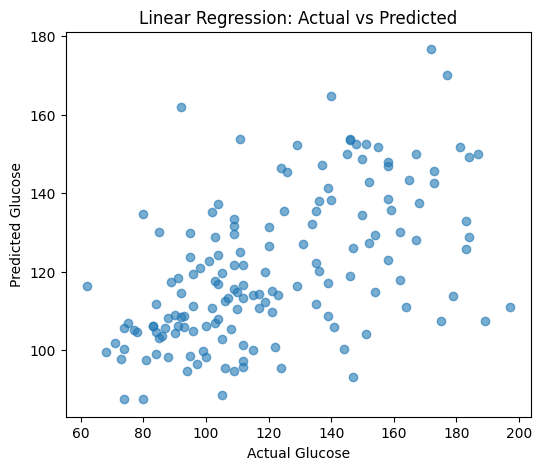

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Step 5a: Initialize and train the model
lin_model = LinearRegression()
lin_model.fit(X_train_lin, y_train_lin)

# Step 5b: Make predictions on test set
y_pred_lin = lin_model.predict(X_test_lin)

# Step 5c: Evaluate using Mean Squared Error
mse_lin = mean_squared_error(y_test_lin, y_pred_lin)
print(f"Linear Regression Mean Squared Error: {mse_lin:.4f}")

# Step 5d: Optional plot - Actual vs Predicted
plt.figure(figsize=(6,5))
plt.scatter(y_test_lin, y_pred_lin, alpha=0.6)
plt.xlabel("Actual Glucose")
plt.ylabel("Predicted Glucose")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()


Logistic Regression Accuracy: 0.7532
Confusion Matrix:
[[79 20]
 [18 37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



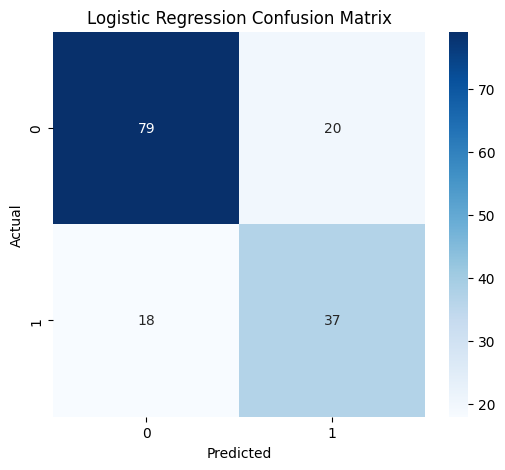

In [28]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

# Step 6a: Initialize and train the model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_log, y_train_log)

# Step 6b: Make predictions on test set
y_pred_log = log_model.predict(X_test_log)

# Step 6c: Evaluate model
acc_log = accuracy_score(y_test_log, y_pred_log)
print(f"Logistic Regression Accuracy: {acc_log:.4f}")

cm = confusion_matrix(y_test_log, y_pred_log)
print("Confusion Matrix:")
print(cm)

print("Classification Report:")
print(classification_report(y_test_log, y_pred_log))

# Step 6d: Optional visualization - Confusion Matrix heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()
